### Baselines (vanilla RL)

## Accelerated Reinforcement Learning via Imitation Learning

## Motivation 

In reinforcement learning (RL), sparse rewards
are a natural way to specify the task to be learned. However,
most RL algorithms struggle to learn in this setting since the
learning signal is mostly zeros.

<img src="plots/old_plots/rl_only_reward.png">

As shown in the example, an RL agent struggles to learn in 200,000 timesteps in a sparse-reward setting, receiving negative average rewards throughout the process. In environments where positive signals are extremely sparse, such as the Game of Go or Starcraft, where the only positive signal is winning the game, it would take forever for the agent to randomly "stumble upon" an policy that consistently guides the agent to receive the positive reward. Most of the time, as the agent is exploring, it receives no informative feedback on its actions.

## Goal

Our goal is to devise a novel approach to enable efficient RL in the sparse reward setting. 

The method we are proposing is: RL + IL

We recognize that RL and IL are already well-studied, our novelty is to combine them for more efficient learning. 

<img src="plots/Accelerated_RL_via_IL.png">

## Problem Setup

Pitfall! ATARI 2600

Reason that we choose it:
- human can provide guidance
- sparse reward setting



## Learning from demonstration (Imitation Learning)

Learn a network that maps state (inputs) to actions (outputs)

State: 84 (height) * 84 (width) * 3 (RGB) image pixels
Action: 8-dimensional boolean vector, where each element of the vector corresponds to a button on the ATARI console 


## Reinforcement Learning in Sparse-Reward Setting

## Results

## My contributions

## Accelerated Reinforcement Learning via Imitation Learning

## Motivation 

In reinforcement learning (RL), sparse rewards
are a natural way to specify the task to be learned. However,
most RL algorithms struggle to learn in this setting since the
learning signal is mostly zeros.

<img src="plots/old_plots/rl_only_reward.png">

As shown in the example, an RL agent struggles to learn in 200,000 timesteps in a sparse-reward setting, receiving negative average rewards throughout the process. In environments where positive signals are extremely sparse, such as the Game of Go or Starcraft, where the only positive signal is winning the game, it would take forever for the agent to randomly "stumble upon" an policy that consistently guides the agent to receive the positive reward. Most of the time, as the agent is exploring, it receives no informative feedback on its actions.

## Goal

Our goal is to devise a novel approach to enable efficient RL in the sparse reward setting. 

The method we are proposing is: RL + IL

We recognize that RL and IL are already well-studied, our novelty is to combine them for more efficient learning. 

<img src="plots/Accelerated_RL_via_IL.png">

## Problem Setup

Pitfall! ATARI 2600

Reason that we choose it:
- human can provide guidance
- sparse reward setting



## Learning from demonstration (Imitation Learning)

Learn a network that maps state (inputs) to actions (outputs)

State: 84 (height) * 84 (width) * 3 (RGB) image pixels
Action: 8-dimensional boolean vector, where each element of the vector corresponds to a button on the ATARI console 


## Reinforcement Learning in Sparse-Reward Setting

## Results

## My contributions

In [1]:
"""
Train an agent using Proximal Policy Optimization from OpenAI Baselines
"""
import retro
import os, inspect
import pickle

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0, parentdir)
from baselines.common.vec_env import SubprocVecEnv
from baselines.common.retro_wrappers import make_retro, wrap_deepmind_retro
from train_ppo import ppo2

game = 'Pitfall-Atari2600'
state = retro.State.DEFAULT
scenario = 'scenario'
record = False
verbose = 1
quiet = 0
obs_type = 'image'
players = 1
dir_note = 'testing'

def addDateTime(s = ""):
    """
    Adds the current date and time at the end of a string.
    Inputs:
        s -> string
    Output:
        S = s_Dyymmdd_HHMM
    """
    import datetime
    date = str(datetime.datetime.now())
    date = date[2:4] + date[5:7] + date[8:10] + '_' + date[11:13] + date[14:16] + date[17:19]
    return s + '_D' + date

def main():
    def make_env():
        obs_type = retro.Observations.IMAGE  # retro.Observations.RAM
        env = retro.make(game=game, state=state, scenario=scenario, record=record, players=players, obs_type=obs_type)
        # env = retro.make(game=game, state=state, scenario=scenario)
        print(retro.__path__)
        env = wrap_deepmind_retro(env)
        return env

    base_dirname = os.path.join(currentdir, "results")

    if not os.path.exists(base_dirname):
        os.mkdir(base_dirname)
    dir_name = "pitfall_ppo2"
    dir_name += dir_note
    dir_name = addDateTime(dir_name)
    dir_name = os.path.join(base_dirname, dir_name)
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

    venv = SubprocVecEnv([make_env] * 8)
    performance = ppo2.learn(
        network='cnn',
        env=venv,
        total_timesteps=int(2e4),
        nsteps=32,
        nminibatches=4,
        lam=0.95,
        gamma=0.99,
        noptepochs=4,
        log_interval=10,
        save_interval=500,
        ent_coef=.02,
        lr=lambda f: f * 3e-4,
        cliprange=0.2,
        base_path=dir_name,
        render_env=False
    )

    performance_fname = os.path.join(dir_name, "performance.p")
    with open(performance_fname, "wb") as f:
        pickle.dump(performance, f)


main()

/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alphalearn0/AcceleratedRL/op






Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Logging to /tmp/openai-2019-12-11-11-32-11-729888
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 156      |
| loss/approxkl           | 6.64e-06 |
| loss/clipfrac           | 0        |
| loss/policy_entropy     | 5.55     |
| loss/policy_loss        | -0.00065 |
| loss/value_loss         | 4.66e-07 |
| misc/explained_variance | -0.174   |
| misc/nupdates           | 1        |
| misc/serial_timesteps   | 32       |
| misc/time_elapsed       | 1.64     |
| misc/total_timesteps    | 256      |
--------------------------------------
Saving to /home/alphalearn0/AcceleratedRL/results/pitfall_ppo2testing_D191211_113207/models/00001
Saved model successfully.
Stepping environment...
Done.


Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 252      |
| loss/approxkl           | 0.00223  |
| loss/clipfrac           | 0.0215   |
| loss/policy_entropy     | 5.37     |
| loss/policy_loss        | -0.00381 |
| loss/value_loss         | 1.94e-07 |
| misc/explained_variance | 0.584    |
| misc/nupdates           | 40       |
| misc/serial_timesteps   | 1.28e+03 |
| misc/time_elapsed       | 42.6     |
| misc/total_timesteps    | 1.02e+04 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 258      |
| loss/approxkl           | 0.00148  |
| loss/clipfrac           | 0.00391  |
| loss/policy_entropy     | 5.48     |
| loss/policy_loss        | -0.00217 |
| loss/value_loss         | 0.00124  |
| mi

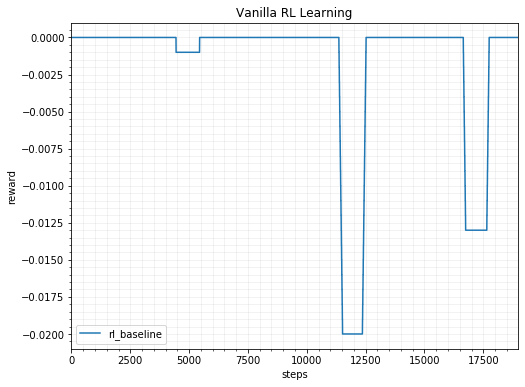

In [2]:
import os
import json
import pickle
import numpy as np
import matplotlib.pyplot as plt
import argparse

def addDateTime(s = ""):
    """
    Adds the current date and time at the end of a string.
    Inputs:
        s -> string
    Output:
        S = s_Dyymmdd_HHMM
    """
    import datetime
    date = str(datetime.datetime.now())
    date = date[2:4] + date[5:7] + date[8:10] + '_' + date[11:13] + date[14:16] + date[17:19]
    return s + '_D' + date

def append_or_create_list_for_key(dict, key, ele):
    if key in dict:
        dict[key].append(ele)
    else:
        dict[key] = [ele]

def smooth(scalars, weight=0.5):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return np.array(smoothed)

def running_avg(list_to_avg, avg_steps=100):
    array_to_avg = np.asarray(list_to_avg)
    array_to_avg = array_to_avg.reshape(array_to_avg.shape[0], -1)
    array_cum_sum = np.copy(array_to_avg)
    for i in range(1, array_to_avg.shape[1]):
        array_cum_sum[:, i] = array_cum_sum[:, i - 1] + array_to_avg[:, i]

    array_avged = (array_cum_sum[:, avg_steps:] - array_cum_sum[:, :-avg_steps]) / avg_steps
    # array_avged = smooth(array_avged)

    return array_avged
parent_dir="pitfall_ppo2testing_D191211_113207"

rl_avg_steps = 1000
metrics_to_plot = ["reward"]
parent_dir = os.path.join("results", parent_dir)
plot_dir = os.path.join(parent_dir, "plots")
plot_dir = addDateTime(plot_dir)

if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

performance_dict = {}
dirname = parent_dir
performance_file = os.path.join(dirname, "performance.p")
model_dir = os.path.join(dirname, "models")
if not os.path.exists(performance_file):
    print(performance_file)

with open(performance_file, "rb") as f:
    performance = pickle.load(f)
    append_or_create_list_for_key(performance_dict, "rl_baseline", performance)

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    for key, val_old in performance_dict.items():
        val = running_avg([ele[metric] for ele in val_old], rl_avg_steps)
        val_mean = val.mean(axis=0)
        val_std = val.std(axis=0)
        line, = plt.plot(val_mean, label=key)
        plt.fill_between(range(0, len(val_mean)),
                         val_mean + val_std, val_mean - val_std, alpha=0.2)
        plt.title('Vanilla RL Learning')
        plt.legend()
        plt.ylabel(metric)
        plt.xlabel("steps")
        # plt.xlim((0, len(val_mean)))
        plt.xlim((0, len(val_mean)))
        plt.minorticks_on()
        plt.grid(True, which="both", alpha=.2)
        plt.savefig(os.path.join(plot_dir, "{}.png".format(metric)))
        plt.show()

### RL with Imitation Learning

In [1]:
"""
Train an agent using Proximal Policy Optimization from OpenAI Baselines
"""
import retro
import os, inspect
import pickle
import numpy as np
import time

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
os.sys.path.insert(0, parentdir)
from baselines.common.vec_env import SubprocVecEnv
from baselines.common.retro_wrappers import make_retro, wrap_deepmind_retro
from train_ppo import ppo2

game = 'Pitfall-Atari2600'
state = retro.State.DEFAULT
scenario = 'scenario'
record = False
verbose = 1
quiet = 0
obs_type = 'image'
players = 1
dir_note = '_rl_justin'

def addDateTime(s = ""):
    """
    Adds the current date and time at the end of a string.
    Inputs:
        s -> string
    Output:
        S = s_Dyymmdd_HHMM
    """
    import datetime
    date = str(datetime.datetime.now())
    date = date[2:4] + date[5:7] + date[8:10] + '_' + date[11:13] + date[14:16] + date[17:19]
    return s + '_D' + date

def main():
    def make_env():
        obs_type = retro.Observations.IMAGE  # retro.Observations.RAM
        env = retro.make(game=game, state=state, scenario=scenario, record=record, players=players, obs_type=obs_type)
        # env = retro.make(game=game, state=state, scenario=scenario)
        print(retro.__path__)
        env = wrap_deepmind_retro(env)
        return env

    base_dirname = os.path.join(currentdir, "results")
    demo_dir = os.path.join(currentdir, "human_data/demonstrations")

    demo_fname = os.path.join(demo_dir, "human_demonstration_10.pkl")

    if not os.path.exists(base_dirname):
        os.mkdir(base_dirname)
    dir_name = "pitfall_ppo2"
    dir_name += dir_note
    dir_name = addDateTime(dir_name)
    dir_name = os.path.join(base_dirname, dir_name)
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)

    with open(demo_fname, "rb") as f:
        demos = pickle.load(f)

    valid_demos = []
    for demo in demos:
        action, score = demo
        valid_action = np.array(action, dtype=np.float32).reshape(1, -1)
        valid_demos.append(valid_action)

    venv = SubprocVecEnv([make_env] * 1)
    performance = ppo2.learn(
        network='cnn',
        env=venv,
        total_timesteps=int(2e4),
        nsteps=32,
        nminibatches=4,
        lam=0.95,
        gamma=0.99,
        noptepochs=16,
        log_interval=10,
        save_interval=500,
        ent_coef=.02,
        lr=lambda f: f * 3e-4,
        cliprange=0.2,
        base_path=dir_name,
        use_demo=True,
        demos=valid_demos,
        render_env = False
    )

    performance_fname = os.path.join(dir_name, "performance.p")
    with open(performance_fname, "wb") as f:
        pickle.dump(performance, f)


        
main()

/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alphalearn0/AcceleratedRL/openai/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alphalearn0/AcceleratedRL/op






Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Logging to /tmp/openai-2019-12-11-11-05-22-813431
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 28       |
| loss/approxkl           | 0.00548  |
| loss/clipfrac           | 0.0742   |
| loss/policy_entropy     | 5.54     |
| loss/policy_loss        | -0.0284  |
| loss/value_loss         | 761      |
| misc/explained_variance | 8.94e-07 |
| misc/nupdates           | 1        |
| misc/serial_timesteps   | 32       |
| misc/time_elapsed       | 1.13     |
| misc/total_timesteps    | 32       |
--------------------------------------
Saving to /home/alphalearn0/AcceleratedRL/results/pitfall_ppo2_rl_justin_D191211_110519/models/00001
Saved model successfully.
Stepping environment...
Don

Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 35       |
| loss/approxkl           | 0.0479   |
| loss/clipfrac           | 0.418    |
| loss/policy_entropy     | 4.16     |
| loss/policy_loss        | -0.0371  |
| loss/value_loss         | 4.86e+03 |
| misc/explained_variance | 1.6e-05  |
| misc/nupdates           | 40       |
| misc/serial_timesteps   | 1.28e+03 |
| misc/time_elapsed       | 39.6     |
| misc/total_timesteps    | 1.28e+03 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.0355   |
| loss/clipfrac           | 0.42     |
| loss/policy_entropy     | 4.63     |
| loss/policy_loss        | -0.0337  |
| loss/value_loss         | 18.8     |
| mi

Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 28       |
| loss/approxkl           | 0.0994   |
| loss/clipfrac           | 0.527    |
| loss/policy_entropy     | 3.68     |
| loss/policy_loss        | -0.0316  |
| loss/value_loss         | 3.53e+03 |
| misc/explained_variance | 0.00136  |
| misc/nupdates           | 180      |
| misc/serial_timesteps   | 5.76e+03 |
| misc/time_elapsed       | 171      |
| misc/total_timesteps    | 5.76e+03 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 35       |
| loss/approxkl           | 0.0468   |
| loss/clipfrac           | 0.48     |
| loss/policy_entropy     | 4.26     |
| loss/policy_loss        | -0.00139 |
| loss/value_loss         | 3.26e+03 |
| mi

Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.088    |
| loss/clipfrac           | 0.527    |
| loss/policy_entropy     | 2.78     |
| loss/policy_loss        | -0.0134  |
| loss/value_loss         | 1.36e+03 |
| misc/explained_variance | -0.00422 |
| misc/nupdates           | 320      |
| misc/serial_timesteps   | 1.02e+04 |
| misc/time_elapsed       | 302      |
| misc/total_timesteps    | 1.02e+04 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.228    |
| loss/clipfrac           | 0.732    |
| loss/policy_entropy     | 4.62     |
| loss/policy_loss        | -0.0251  |
| loss/value_loss         | 1.6e+03  |
| mi

Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.111    |
| loss/clipfrac           | 0.637    |
| loss/policy_entropy     | 4.12     |
| loss/policy_loss        | -0.0357  |
| loss/value_loss         | 1.16e+03 |
| misc/explained_variance | -0.00146 |
| misc/nupdates           | 460      |
| misc/serial_timesteps   | 1.47e+04 |
| misc/time_elapsed       | 434      |
| misc/total_timesteps    | 1.47e+04 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.0778   |
| loss/clipfrac           | 0.59     |
| loss/policy_entropy     | 4.11     |
| loss/policy_loss        | -0.0265  |
| loss/value_loss         | 902      |
| mi

Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.0296   |
| loss/clipfrac           | 0.393    |
| loss/policy_entropy     | 4.94     |
| loss/policy_loss        | -0.0512  |
| loss/value_loss         | 2.3e+03  |
| misc/explained_variance | 0.00228  |
| misc/nupdates           | 600      |
| misc/serial_timesteps   | 1.92e+04 |
| misc/time_elapsed       | 568      |
| misc/total_timesteps    | 1.92e+04 |
--------------------------------------
Stepping environment...
Done.
--------------------------------------
| eplenmean               | nan      |
| eprewmean               | nan      |
| fps                     | 36       |
| loss/approxkl           | 0.0099   |
| loss/clipfrac           | 0.18     |
| loss/policy_entropy     | 4.68     |
| loss/policy_loss        | -0.0256  |
| loss/value_loss         | 2.28e+03 |
| mi

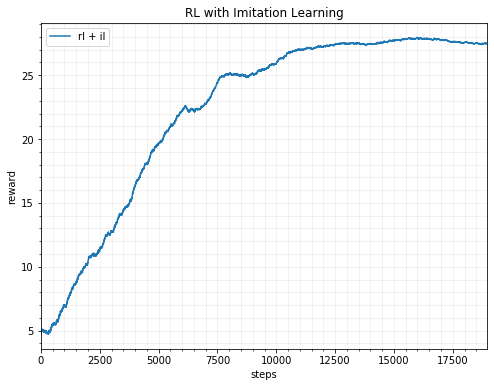

In [4]:
parent_dir="pitfall_ppo2testing_D191211_105826"

rl_avg_steps = 1000
metrics_to_plot = ["reward"]
parent_dir = os.path.join("results", parent_dir)
plot_dir = os.path.join(parent_dir, "plots")
plot_dir = addDateTime(plot_dir)

if not os.path.exists(plot_dir):
    os.mkdir(plot_dir)

performance_dict = {}
dirname = parent_dir
performance_file = os.path.join(dirname, "performance.p")
model_dir = os.path.join(dirname, "models")
if not os.path.exists(performance_file):
    print(performance_file)

with open(performance_file, "rb") as f:
    performance = pickle.load(f)
    append_or_create_list_for_key(performance_dict, "rl + il", performance)

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 6))
    for key, val_old in performance_dict.items():
        val = running_avg([ele[metric] for ele in val_old], rl_avg_steps)
        val_mean = val.mean(axis=0)
        val_std = val.std(axis=0)
        line, = plt.plot(val_mean, label=key)
        plt.fill_between(range(0, len(val_mean)),
                         val_mean + val_std, val_mean - val_std, alpha=0.2)
        
        plt.title('RL with Imitation Learning')
        plt.legend()
        plt.ylabel(metric)
        plt.xlabel("steps")
        # plt.xlim((0, len(val_mean)))
        plt.xlim((0, len(val_mean)))
        plt.minorticks_on()
        plt.grid(True, which="both", alpha=.2)
        plt.savefig(os.path.join(plot_dir, "{}.png".format(metric)))
        plt.show()